
**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

* Anomaly detection is the process of identifying data points that are **very different from normal data**
* These unusual points are called anomalies or outliers
* Commonly used in fraud detection, network security, and fault detection

Types of anomalies:

Point anomalies

* A single data point that is abnormal compared to others
* *Example:*

  * *A credit card transaction of ₹5,00,000 when normal transactions are below ₹10,000*
* Core idea:

  * One data point itself is unusual

Contextual anomalies

* A data point is abnormal **only in a specific context**
* Context can be time, location, or condition
* *Example:*

  * *Very high electricity usage at midnight but normal during daytime*
* Core idea:

  * The anomaly depends on the situation or context

Collective anomalies

* A group of data points together form an anomaly
* Individual points may look normal alone
* *Example:*

  * *A sudden sequence of small failed login attempts indicating a cyber attack*
* Core idea:

  * The pattern or group behavior is abnormal


**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

**Isolation Forest**

* Approach:

  * Isolates anomalies instead of modeling normal behavior
  * Anomalies are easier to separate from data
* Suitable use cases:

  * Large datasets
  * High-dimensional data
  * Fraud detection, intrusion detection
* Core idea:

  * Anomalies are few and different, so they get isolated quickly

**DBSCAN**

* Approach:

  * Density-based clustering
  * Points in low-density regions are marked as noise
* Suitable use cases:

  * Data with clusters of arbitrary shapes
  * When noise detection is required
* Core idea:

  * Points not belonging to any dense region are anomalies

**Local Outlier Factor (LOF)**

* Approach:

  * Compares local density of a point with its neighbors
  * Lower density than neighbors means anomaly
* Suitable use cases:

  * Data with varying densities
  * Detecting local outliers
* Core idea:

  * Anomalies are less dense than nearby points



**Question 3: What are the key components of a Time Series? Explain each with one example.**

A time series is data collected over time at regular intervals.

Key components:

**Trend**

* The long-term upward or downward movement in data
* *Example:*

  * *Gradual increase in online shopping sales over years*

**Seasonality**

* Repeating patterns at fixed intervals
* **Example:**

  * **Higher ice-cream sales every summer**

**Cyclic**

* Fluctuations over long, irregular periods
* Usually influenced by economic or business cycles
* *Example:*

  * *Rise and fall in stock market during economic booms and recessions*

**Irregular (Noise)**

* Random, unpredictable variations
* Cannot be explained by trend or seasonality
* *Example:*

  * *Sudden drop in sales due to unexpected events like lockdown*s

Core idea:
A time series is a combination of long-term movement, repeating patterns, cycles, and random noise.



**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

**Stationary time series**

* Mean remains constant over time
* Variance remains constant
* No changing trend or seasonality

Core idea:
Statistical properties of the series do not change over time.

How to test stationarity:

* Visual inspection:

  * Check if mean and variance look stable over time
* Statistical tests:

  * Augmented Dickey-Fuller (ADF) test
  * If p-value < 0.05 → series is stationary

How to transform a non-stationary series into stationary:

* Differencing:

  * Subtract current value from previous value
* Removing trend:

  * Detrending the series
* Removing seasonality:

  * Seasonal differencing
* Log or square-root transformation:

  * Stabilizes variance

Core idea:
We make the data stable so time-series models can work correctly.


**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**

**AR (AutoRegressive)**

* Uses past values of the time series to predict future values
* Structure:

  * Current value depends on previous values
* *Example:*

  * *Today’s temperature depends on temperatures of previous days*
* Used when:

  * Data shows correlation with its own past values

**MA (Moving Average)**

* Uses past error terms to predict future values
* Structure:

  * Current value depends on previous forecast errors
* *Example:*

  * *Stock price influenced by recent random shocks*
* Used when:

  * Errors show correlation over time

**ARIMA (AutoRegressive Integrated Moving Average)**

* Combines AR and MA with differencing
* Structure:

  * AR + differencing (I) + MA
* *Example:*

  * *Forecasting sales data with a trend*
* Used when:

  * Data is non-stationary but can be made stationary

**SARIMA (Seasonal ARIMA)**

* Extends ARIMA by adding seasonal components
* Structure:

  * ARIMA + seasonal AR, MA, differencing
* *Example:*

  * *Monthly airline passengers with yearly seasonality*
* Used when:

  * Data has repeating seasonal patterns

**SARIMAX (Seasonal ARIMA with Exogenous variables)**

* Extends SARIMA by including external variables
* Structure:

  * SARIMA + additional independent variables
* *Example:*

  * *Sales forecasting using price, promotions, and holidays*
* Used when:

  * External factors influence the time series

Core idea:
Each model adds more structure to handle trend, seasonality, and external influences.



/tmp/ipython-input-1101196403.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="1949-01", periods=len(passengers), freq="M")


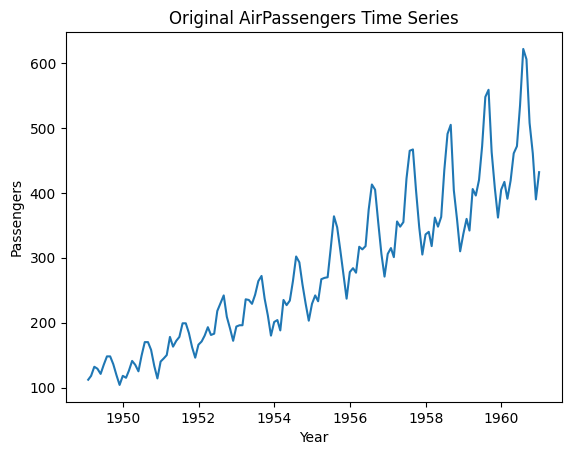

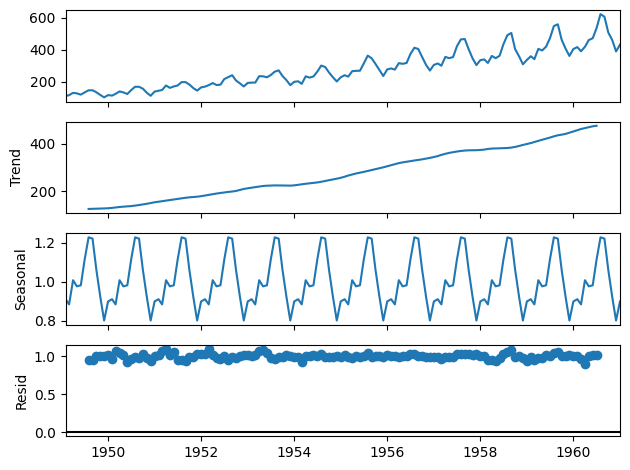

In [1]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components


import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# AirPassengers dataset (monthly data)
passengers = [
112,118,132,129,121,135,148,148,136,119,104,118,
115,126,141,135,125,149,170,170,158,133,114,140,
145,150,178,163,172,178,199,199,184,162,146,166,
171,180,193,181,183,218,230,242,209,191,172,194,
196,196,236,235,229,243,264,272,237,211,180,201,
204,188,235,227,234,264,302,293,259,229,203,229,
242,233,267,269,270,315,364,347,312,274,237,278,
284,277,317,313,318,374,413,405,355,306,271,306,
315,301,356,348,355,422,465,467,404,347,305,336,
340,318,362,348,363,435,491,505,404,359,310,337,
360,342,406,396,420,472,548,559,463,407,362,405,
417,391,419,461,472,535,622,606,508,461,390,432
]

dates = pd.date_range(start="1949-01", periods=len(passengers), freq="M")
data = pd.Series(passengers, index=dates)

# Plot original time series
plt.figure()
plt.plot(data)
plt.title("Original AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(data, model="multiplicative")

# Plot decomposition
decomposition.plot()
plt.show()


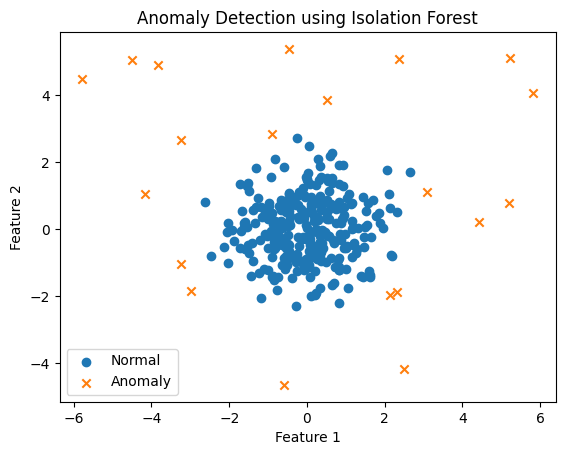

In [2]:
# Q7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies and visualize the anomalies on a 2D scatter plot.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic numerical data (2D)
# This simulates fare-related numerical patterns
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))

X = np.vstack((normal_data, anomalies))

# Apply Isolation Forest
model = IsolationForest(contamination=0.06, random_state=42)
labels = model.fit_predict(X)

# Separate normal points and anomalies
normal_points = X[labels == 1]
anomaly_points = X[labels == -1]

# Plot the results
plt.figure()
plt.scatter(normal_points[:, 0], normal_points[:, 1], marker='o', label='Normal')
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], marker='x', label='Anomaly')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


/tmp/ipython-input-115568150.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="1949-01", periods=len(passengers), freq="M")
/tmp/ipython-input-115568150.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(


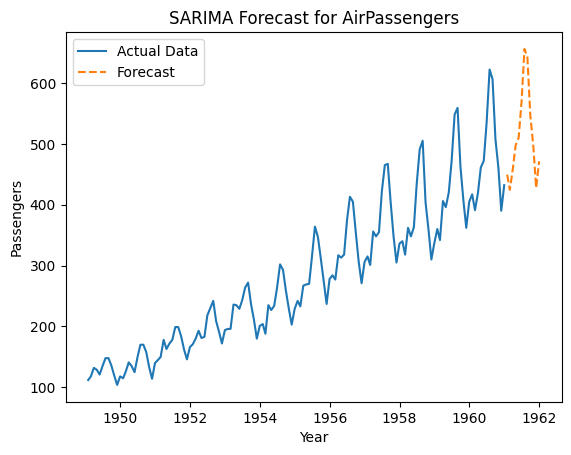

In [3]:
# Q8. Train a SARIMA model on the monthly airline passengers dataset.
# Forecast the next 12 months and visualize the results.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# AirPassengers monthly dataset
passengers = [
112,118,132,129,121,135,148,148,136,119,104,118,
115,126,141,135,125,149,170,170,158,133,114,140,
145,150,178,163,172,178,199,199,184,162,146,166,
171,180,193,181,183,218,230,242,209,191,172,194,
196,196,236,235,229,243,264,272,237,211,180,201,
204,188,235,227,234,264,302,293,259,229,203,229,
242,233,267,269,270,315,364,347,312,274,237,278,
284,277,317,313,318,374,413,405,355,306,271,306,
315,301,356,348,355,422,465,467,404,347,305,336,
340,318,362,348,363,435,491,505,404,359,310,337,
360,342,406,396,420,472,548,559,463,407,362,405,
417,391,419,461,472,535,622,606,508,461,390,432
]

dates = pd.date_range(start="1949-01", periods=len(passengers), freq="M")
data = pd.Series(passengers, index=dates)

# Train SARIMA model
model = SARIMAX(
    data,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.forecast(steps=12)
forecast_dates = pd.date_range(
    start=data.index[-1] + pd.offsets.MonthEnd(1),
    periods=12,
    freq="M"
)

# Plot actual data and forecast
plt.figure()
plt.plot(data, label="Actual Data")
plt.plot(forecast_dates, forecast, linestyle="--", label="Forecast")
plt.title("SARIMA Forecast for AirPassengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


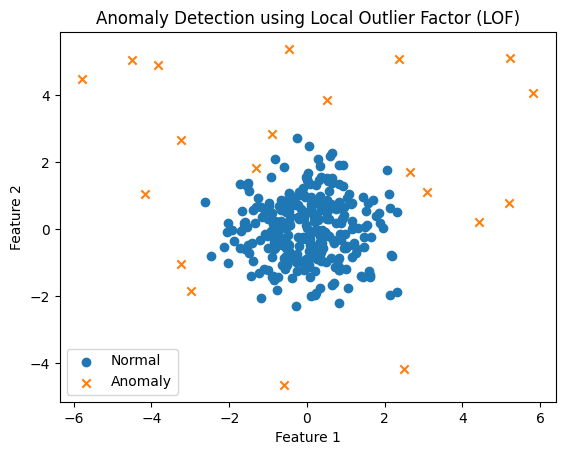

In [4]:
#Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic numerical data (2D)
np.random.seed(42)
normal_data = np.random.randn(300, 2)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))

X = np.vstack((normal_data, outliers))

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.06)
labels = lof.fit_predict(X)

# Separate normal points and anomalies
normal_points = X[labels == 1]
anomaly_points = X[labels == -1]

# Plot the results
plt.figure()
plt.scatter(normal_points[:, 0], normal_points[:, 1], marker='o', label='Normal')
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], marker='x', label='Anomaly')
plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Question 10: You are working as a data scientist for a power grid monitoring company.**
**Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow:**

* **How would you detect anomalies in this streaming data (Isolation Forest / LOF /DBSCAN)?**

* **Which time series model would you use for short-term forecasting (ARIMA /SARIMA / SARIMAX)?**

* **How would you validate and monitor the performance over time?**

* **How would this solution help business decisions or operations?**

*Ans:*

**1. Detecting anomalies in streaming data**

For real-time monitoring, I would **not rely on a single method**.

**Primary choice: Isolation Forest**

* Works well with **high-frequency streaming data**
* Fast and scalable
* Does not assume any specific data distribution
* Very effective for sudden spikes or drops in energy usage

**Supporting method: LOF**

* Useful at the **regional level**
* Helps detect anomalies relative to **local consumption behavior**
* Especially helpful when different regions have different baselines

**Why not DBSCAN for real-time?**

* Parameter tuning is difficult in streaming scenarios
* Not ideal when data distribution changes frequently

**Practical setup**

* Train Isolation Forest on recent rolling windows (e.g., last 7–14 days)
* Score incoming data points in real time
* Flag points with high anomaly scores for alerts

*2. Time series model for short-term forecasting**

**Best choice: SARIMAX**

Why SARIMAX:

* Energy demand shows **strong daily and weekly seasonality**
* External factors like:

  * Temperature
  * Weather conditions
  * Region
    strongly influence demand

SARIMAX allows:

* Seasonal patterns (daily / weekly)
* Inclusion of **exogenous variables** like weather

**Usage**

* Forecast next few hours to 1–2 days ahead
* Used as a baseline to compare real-time consumption

**3. Validation and continuous monitoring**

**For forecasting**

* Track metrics such as:

  * MAE
  * RMSE
  * MAPE
* Use rolling-window validation
* Re-train models periodically to handle demand shifts

**For anomaly detection**

* Monitor:

  * Number of anomalies per day
  * False alarms vs confirmed incidents
* Adjust contamination thresholds dynamically
* Combine alerts with domain rules (e.g., scheduled maintenance)

**4. Business and operational impact**

This solution directly supports operations:

* **Early fault detection**

  * Equipment failures
  * Power theft
  * Sensor malfunctions
* **Load balancing**

  * Prevents grid overload
* **Cost optimization**

  * Better demand forecasting reduces excess generation
* **Faster response**

  * Real-time alerts enable immediate action


> “By combining SARIMAX for short-term demand forecasting and Isolation Forest for real-time anomaly detection, we can proactively monitor the grid, prevent outages, and optimize energy distribution.”

